In [5]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split

In [9]:
boston = datasets.load_boston()

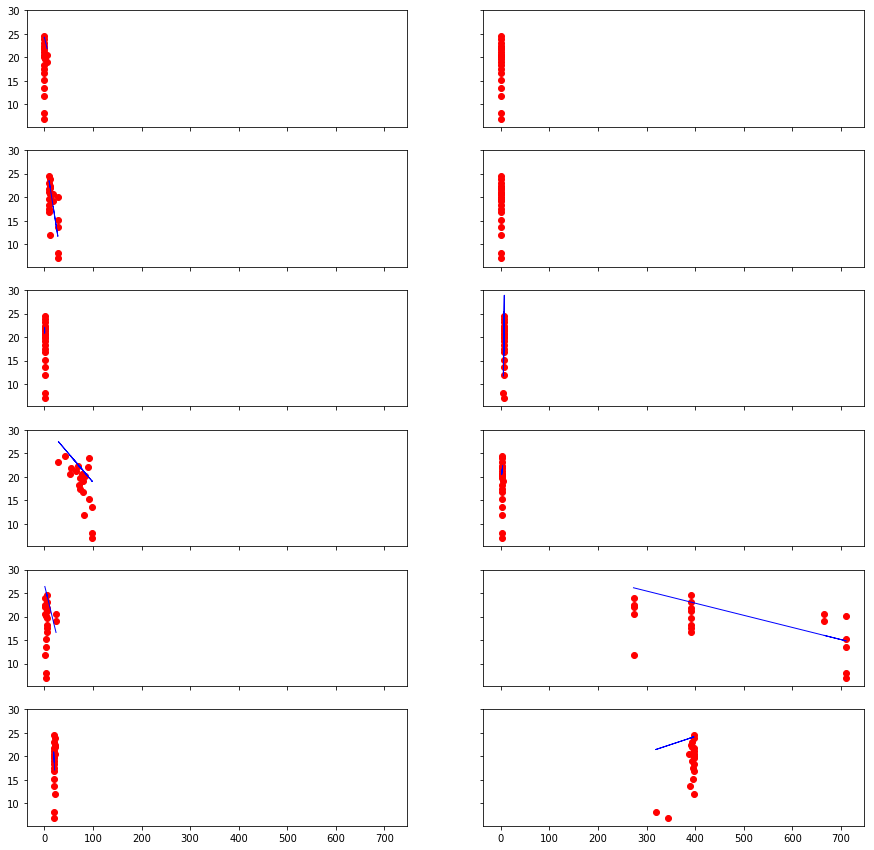

In [10]:
f, axarr = plt.subplots(6,2, sharex=True, sharey=True,figsize=(15,15))
for i in range(0,6):
    for j in range(0,2):
        boston_X = boston.data[:, np.newaxis, i*2+j]
        
        boston_dataset_X_train = boston_X[:-20]
        boston_dataset_X_test = boston_X[-20:]
        
        boston_dataset_y_train = boston.target[:-20]
        boston_dataset_y_test = boston.target[-20:]
        
        regr = linear_model.LinearRegression()
        
        regr.fit(boston_dataset_X_train, boston_dataset_y_train)
        
        axarr[i,j].scatter(boston_dataset_X_test, boston_dataset_y_test,  color='red')
        axarr[i,j].plot(boston_dataset_X_test, regr.predict(boston_dataset_X_test), color='blue', linewidth=1)
plt.show()

In [30]:
diabetes = datasets.load_diabetes()
diabetes_X = diabetes.data
diabetes_Y = diabetes.target
diabetes_X_train = diabetes_X[:-50]
diabetes_X_test = diabetes_X[-50:]
diabetes_y_train = diabetes_Y[:-50]
diabetes_y_test = diabetes_Y[-50:]

In [31]:
regressors = {}
regressors['LinReg'] =linm.LinearRegression()
regressors['Ridge'] = linm.Ridge(alpha = .5)
regressors['Lasso'] = linm.Lasso(alpha = 5.1)
regressors['ElNet'] =linm.ElasticNet(alpha = .5, l1_ratio=0.5)
fit_results={}
for key in regressors:
    regr = regressors[key]
    regr.fit(diabetes_X_train, diabetes_y_train)
    mse = np.mean((regr.predict(diabetes_X_test) - diabetes_y_test) ** 2)
    w = regr.coef_
    wl1 = np.sum(np.abs(w))
    wl2 = np.sqrt(np.sum(w**2))
    fit_results[key]= { 'mse': mse, 'wl2': wl2, 'wl1': wl1, 'w': w}
    print("{}\n----------\n  mse={}\n  wl1={}\n  wl2={}\n  w={}\n ".format(key,mse,wl1,wl2,w))

LinReg
----------
  mse=1789.5698810318208
  wl1=3260.703769182654
  wl2=1274.171756925127
  w=[   1.19680495 -233.50366519  519.88450429  304.48097981 -726.44619916
  415.80697199   83.01061117  203.1648289   667.92936385  105.27983988]
 
Ridge
----------
  mse=2384.1858647392587
  wl1=1511.0823340013712
  wl2=589.1449165292609
  w=[  23.62740295 -119.32265523  362.44657362  222.30799722  -11.56467397
  -45.46192157 -169.43933329  129.82831679  292.72970213  134.35375724]
 
Lasso
----------
  mse=5912.974117294878
  wl1=0.0
  wl2=0.0
  w=[ 0.  0.  0.  0.  0.  0. -0.  0.  0.  0.]
 
ElNet
----------
  mse=5781.123148775016
  wl1=39.063433331886635
  wl2=14.336395063161204
  w=[ 1.48801264  0.          7.23427291  4.94114391  2.19772301  1.7139797
 -4.52179996  5.31415092  6.88097675  4.77137353]
 


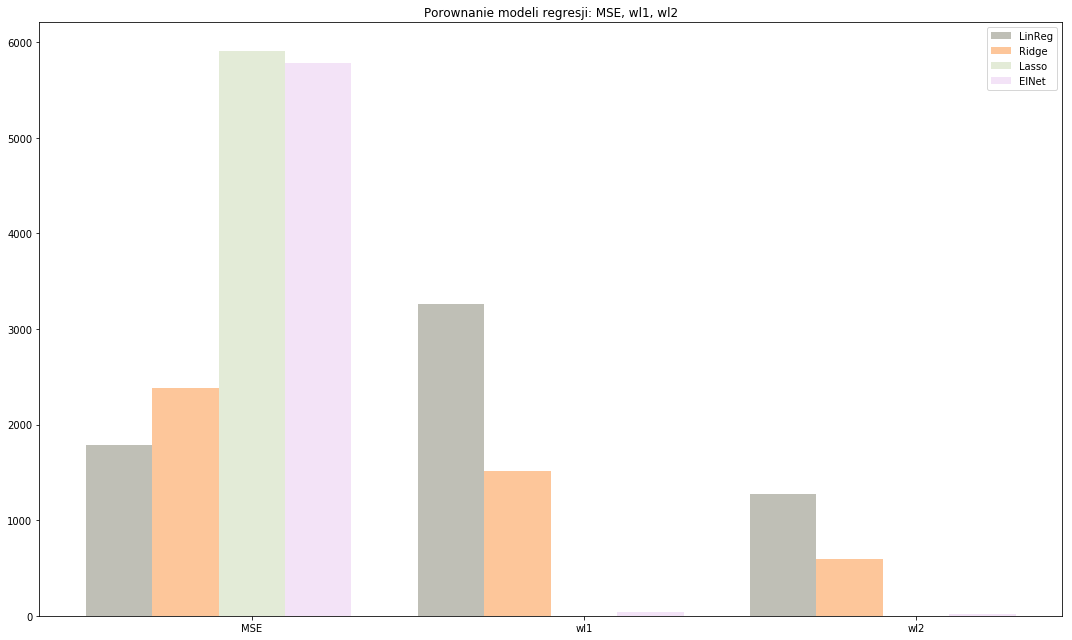

In [34]:
groups = 3
index = np.arange(groups)
bar_width = .2
opacity = 0.4
fig, ax = plt.subplots(figsize=(15,9))
t=0
for key in regressors:
    results = fit_results[key]
    res_val = (results['mse'],results['wl1'],results['wl2'])
    plt.bar(index+ bar_width*t, res_val, bar_width,
                 alpha=opacity,
                 color=np.random.rand(1,3),
                 label=key)
    t+=1
plt.title('Porownanie modeli regresji: MSE, wl1, wl2')
plt.xticks(index + (t-2)*bar_width, ('MSE', 'wl1', 'wl2'))
plt.legend()
plt.tight_layout()
plt.show()

In [44]:
import pandas as pd

In [41]:
malzenstwa = pd.read_csv('malzenstwa.csv', sep=';', encoding='iso-8859-1')

In [43]:
ludnosc = malzenstwa.ludnosc
malzenstwa_count = malzenstwa.malzenstwa

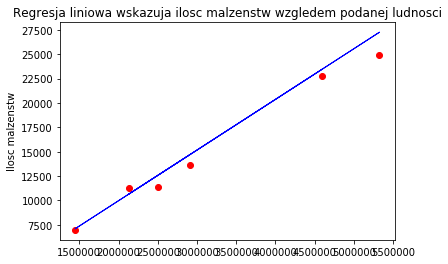

In [90]:
X_train, X_test, Y_train, Y_test = train_test_split(ludnosc, malzenstwa_count, test_size=0.33)

regr = linear_model.LinearRegression()

regr.fit(X_train.values.reshape(-1,1), Y_train.values.reshape(-1,1))

plt.scatter(X_test.values, Y_test.values,  color='red')
plt.plot(X_test, regr.predict(X_test.values.reshape(-1,1)), color='blue', linewidth=1)
plt.title('Regresja liniowa wskazuja ilosc malzenstw wzgledem podanej ludnosci')
plt.ylabel('Ilosc malzenstw')
plt.show()

In [76]:
wydatki_df = pd.read_csv('wydatki.csv', sep=',', encoding='iso-8859-1')
dochody = wydatki_df.Dochody
wydatki = wydatki_df.Wydatki

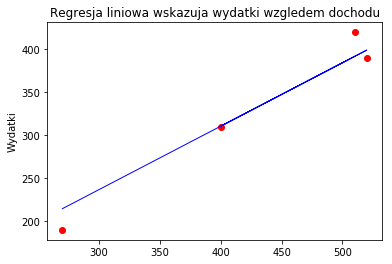

In [92]:
X_train, X_test, Y_train, Y_test = train_test_split(dochody, wydatki, test_size=0.33)

regr = linear_model.LinearRegression()

regr.fit(X_train.values.reshape(-1,1), Y_train.values.reshape(-1,1))
        
plt.scatter(X_test.values, Y_test.values,  color='red')
plt.plot(X_test, regr.predict(X_test.values.reshape(-1,1)), color='blue', linewidth=1)
plt.title('Regresja liniowa wskazuja wydatki wzgledem dochodu')
plt.ylabel('Wydatki')
plt.show()

In [173]:
random_array = np.random.uniform(0,10, size=(2, 100))

In [174]:
print('Średnie x oraz y')
x_sr = random_array[0,:].mean()
print(x_sr)
y_sr = random_array[1,:].mean()
print(y_sr)

Średnie x oraz y
4.71107640393722
5.297841856185082


In [175]:
print('Odjęte wartości średnich od x oraz y')
x_minus_x_sr = np.array([x - x_sr for x in random_array[0,:]])
y_minus_y_sr = np.array([y - y_sr for y in random_array[1,:]])

Odjęte wartości średnich od x oraz y


In [176]:
print('Kwadrat powyższych wartości')
x_minus_x_sr_square = np.square(x_minus_x_sr)
y_minus_y_sr_square = np.square(y_minus_y_sr)

Kwadrat powyższych wartości


In [177]:
product = x_minus_x_sr_square * y_minus_y_sr_square

In [178]:
result_df = pd.DataFrame(data = {'x' : random_array[0,:], 'y' : random_array[1, :], 'x-x_sr': x_minus_x_sr, 
                                 'y-y_sr': y_minus_y_sr, '(x-x_sr)^2': x_minus_x_sr_square,'(y-y_sr)^2': y_minus_y_sr_square,
                                  '(x-x_sr) * (y-y_sr)' : product})

In [179]:
print(x_sr)
print(y_sr)
result_df

4.71107640393722
5.297841856185082


,x,y,x-x_sr,y-y_sr,(x-x_sr)^2,(y-y_sr)^2,(x-x_sr) * (y-y_sr)
0,0.257338,2.225472,-4.453738,-3.072370,19.835786,9.439455,187.239007
1,5.167013,2.644824,0.455937,-2.653018,0.207878,7.038506,1.463152
2,6.918001,7.611964,2.206925,2.314122,4.870517,5.355161,26.082404
3,8.591914,4.831016,3.880838,-0.466826,15.060902,0.217927,3.282170
4,2.355780,5.121136,-2.355296,-0.176706,5.547419,0.031225,0.173218
5,2.356955,1.256505,-2.354122,-4.041337,5.541890,16.332404,90.512383
6,6.410047,8.229751,1.698971,2.931909,2.886502,8.596091,24.812636
7,8.856198,9.537373,4.145121,4.239531,17.182032,17.973622,308.823352
8,7.615340,0.149490,2.904263,-5.148351,8.434745,26.505523,223.567327
9,8.166321,6.559467,3.455245,1.261625,11.938718,1.591699,19.002843


In [180]:
a = result_df['(x-x_sr) * (y-y_sr)'].sum() / result_df['(x-x_sr)^2'].sum()

In [181]:
a

7.795437510657557

In [182]:
b = y_sr - a * x_sr

In [183]:
b

-31.42705985864084

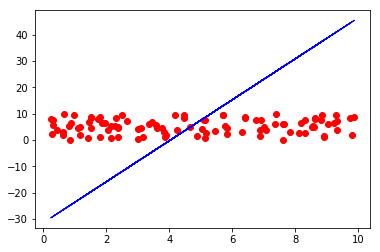

In [184]:
plt.scatter(random_array[0,:], random_array[1,:],  color='red')
plt.plot(random_array[0,:], a * random_array[0,:] + b, color='blue', linewidth=1)
plt.show()